<a href="https://colab.research.google.com/github/PM518/DeepLearning-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import requests
from io import StringIO

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
url="https://raw.githubusercontent.com/PM518/DeepLearning-Project/main/clean.csv"
req=requests.get(url)
data=StringIO(req.text)
df=pd.read_csv(data)

In [114]:
df.shape

(8881, 16)

In [115]:
df.isnull().sum()

index                    0
links                    0
pincode                  0
bedrooms                 0
bathroom                 0
parking                  0
furniture                0
carpet_area_sqft         0
agent                    0
transaction_type         0
property_type            0
price                    0
Latitude                 0
Longitude                0
location                 0
location_with_pincode    0
dtype: int64

In [116]:
df.duplicated().sum()

0

In [117]:
df.head()

,index,links,pincode,bedrooms,bathroom,parking,furniture,carpet_area_sqft,agent,transaction_type,property_type,price,Latitude,Longitude,location,location_with_pincode
0,0,https://www.magicbricks.com/propertyDetails/5-...,400080,5,5,covered parking,unfurnished,2200,Not certified,New Property,Penthouse,59000000,19.1760,72.9522,S.B. Road,S.B. Road - 400080
1,1,https://www.magicbricks.com/propertyDetails/4-...,400010,4,4,covered parking,unfurnished,3926,certified agent,New Property,Penthouse,239500000,18.3667,72.9333,Mazgaon,Mazgaon - 400010
2,2,https://www.magicbricks.com/propertyDetails/4-...,400049,4,4,No covered parking,furnished,4200,Not certified,Resale,Penthouse,185000000,19.1026,72.8242,Juhu,Juhu - 400049
3,3,https://www.magicbricks.com/propertyDetails/5-...,400049,5,5,No covered parking,furnished,4800,Not certified,Resale,Penthouse,450000000,19.1026,72.8242,Juhu,Juhu - 400049
4,4,https://www.magicbricks.com/propertyDetails/4-...,400071,4,5,No covered parking,furnished,2250,Not certified,Resale,Penthouse,80000000,19.0348,72.8929,Chembur,Chembur - 400071


In [118]:
df.drop(['index','links','Latitude','Longitude','location','location_with_pincode'],axis = 1 , inplace=True)

In [119]:
df = pd.get_dummies(data=df , columns = ['parking','furniture','agent','transaction_type','property_type'],drop_first=True)

<Axes: >

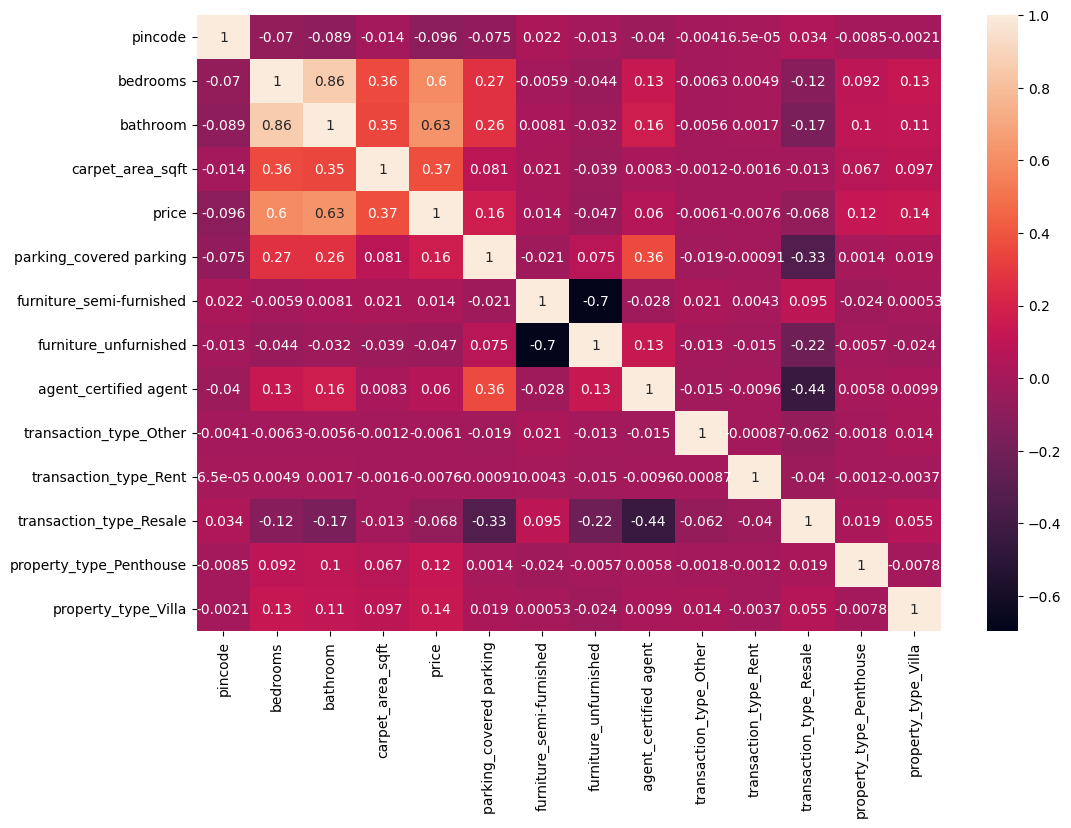

In [120]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)

In [121]:
df.drop('bathroom',axis = 1,inplace=True)

In [122]:
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5950, 12)
(2931, 12)
(5950,)
(2931,)


In [124]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [125]:
# model = Sequential()
# model.add(Dense(15 , input_dim=12 , activation = 'relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(15,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(15,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

In [126]:
model = Sequential()
model.add(Dense(512, input_dim=12, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               6656      
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 181249 (708.00 KB)
Trainable params: 181

In [128]:
history=model.fit(X_train, y_train, validation_split=0.33, epochs=600, batch_size=80, verbose=1)

Epoch 1/600
50/50 [==============================] - 2s 13ms/step - loss: 2763566641840128.0000 - val_loss: 4412163263299584.0000
Epoch 2/600
50/50 [==============================] - 1s 10ms/step - loss: 2758350135623680.0000 - val_loss: 4387578870497280.0000
Epoch 3/600
50/50 [==============================] - 1s 11ms/step - loss: 2618796447629312.0000 - val_loss: 3937481598697472.0000
Epoch 4/600
50/50 [==============================] - 0s 10ms/step - loss: 1914547707314176.0000 - val_loss: 2356764787867648.0000
Epoch 5/600
50/50 [==============================] - 1s 12ms/step - loss: 1279675439513600.0000 - val_loss: 2273625763741696.0000
Epoch 6/600
50/50 [==============================] - 0s 9ms/step - loss: 1196628488749056.0000 - val_loss: 2148536854511616.0000
Epoch 7/600
50/50 [==============================] - 1s 11ms/step - loss: 1138463625707520.0000 - val_loss: 2133821893902336.0000
Epoch 8/600
50/50 [==============================] - 0s 9ms/step - loss: 1114907810463744.0

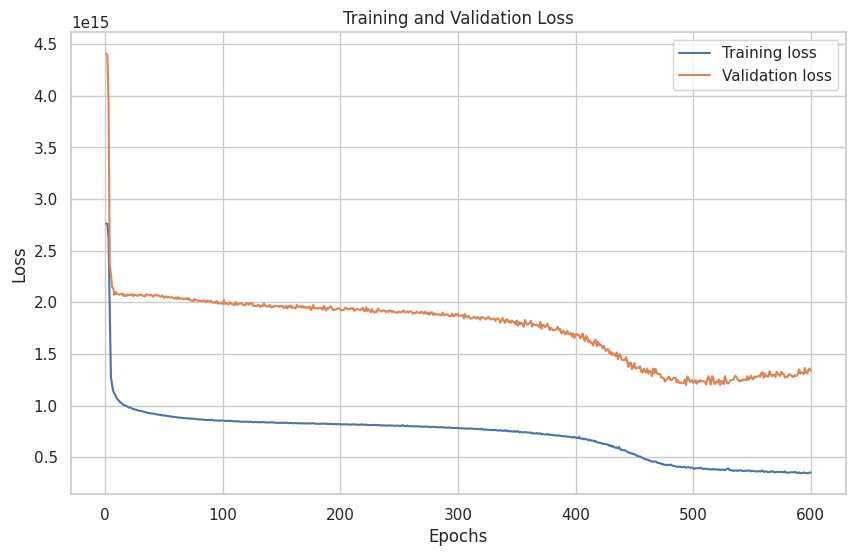

In [135]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=loss, label='Training loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [130]:
predictions = model.predict(X_test)

92/92 [==============================] - 0s 3ms/step


In [131]:
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))

MSE:  555587502923520.06
RMSE:  23570903.735824812


In [132]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
p = X_train.shape[1]

n = X_test.shape[0]  # Number of samples in the test set
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('R-squared (R2):', r2)
print('Adjusted R-squared (adj-R2):', adj_r2)

R-squared (R2): 0.6735326034678178
Adjusted R-squared (adj-R2): 0.672190037066726
